In [76]:
import pandas as pd
from sklearn.decomposition import PCA, SparsePCA
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [111]:
df = pd.read_csv('sample_date.csv', header=0)

In [121]:
df.groupby('pid').count().min(axis=1)

pid
1     160
2      88
3      62
4      48
5      77
6     193
7     152
8     112
9      98
10     92
11     79
13      0
14     96
15      0
16     99
dtype: int64

In [113]:
pca = PCA(n_components=5, svd_solver='full')
df_trans = pd.concat([pd.DataFrame(pca.fit_transform(df.drop(['pid', 'date', 'day_of_week'], axis=1).fillna(0))), df[['pid', 'date', 'day_of_week']]], axis=1)

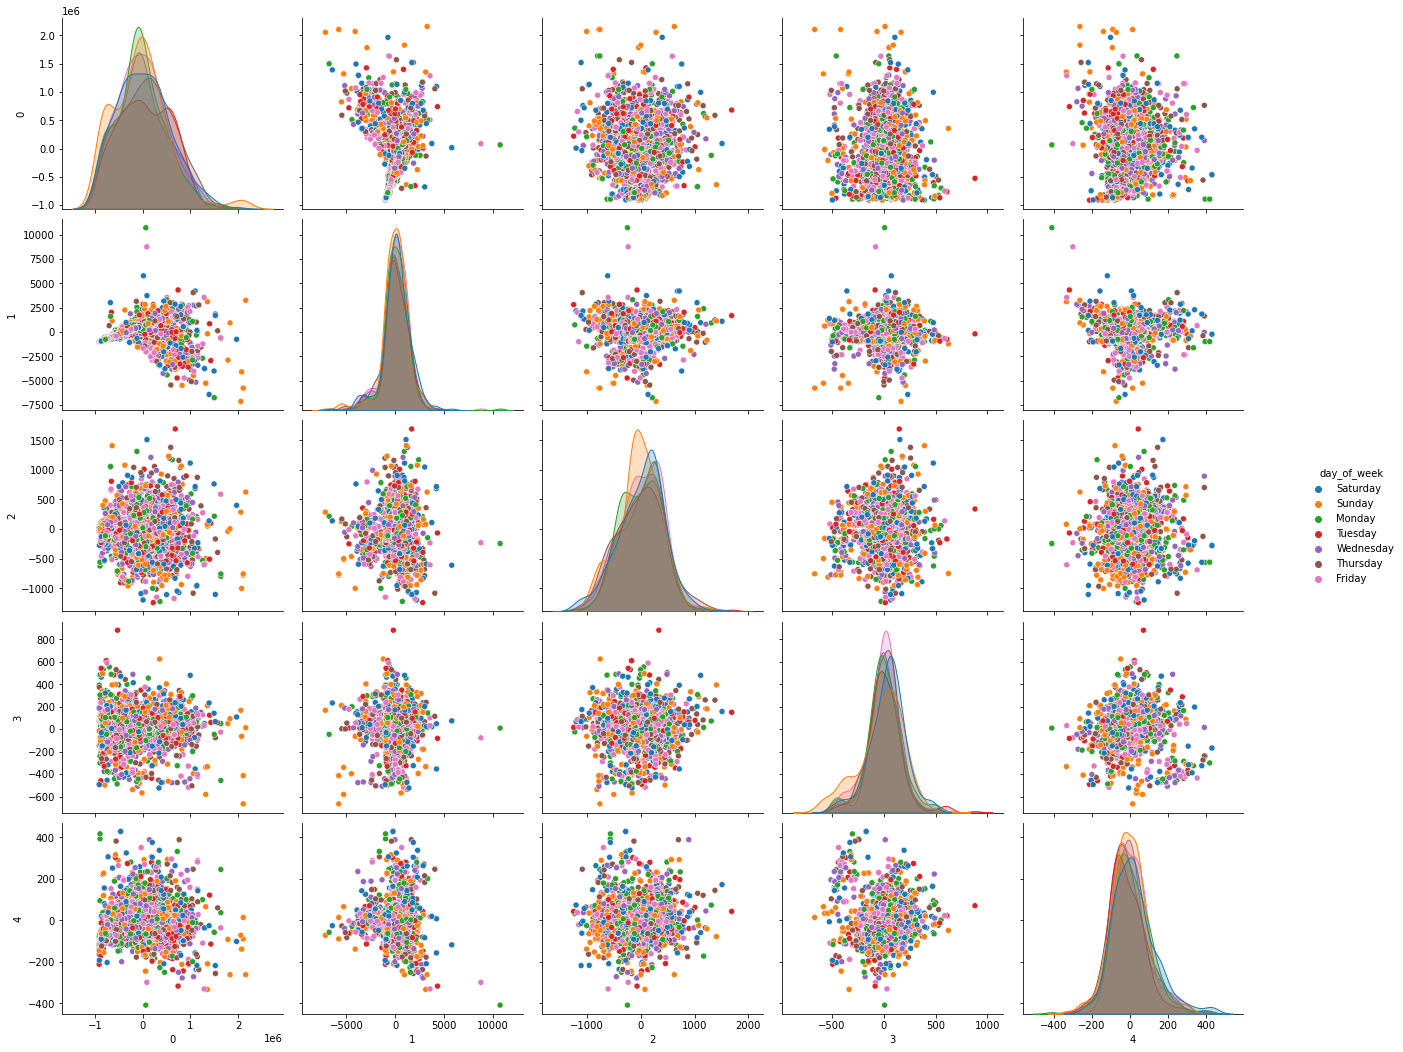

In [115]:
#sns.pairplot(data=df_trans, hue='pid', palette=sns.color_palette("tab10", n_colors=len(df_trans['pid'].unique()))).fig.set_size_inches(20,15)
sns.pairplot(data=df_trans.drop(['pid', 'date'],axis=1), hue='day_of_week').fig.set_size_inches(20,15)

In [88]:
n_clusters = 5
df_cluster = df_trans.drop('pid', axis=1)
km = KMeans(n_clusters=n_clusters).fit(df_cluster)

In [89]:
membership = km.predict(df_cluster)
buddies = {pid: {i:0 for i in range(n_clusters)} for pid in range(1,17)}
for m, pid in zip(membership, df['pid']):
    buddies[pid][m] += 1
groups = [[] for _ in range(n_clusters)]
for key, value in buddies.items():
    groups[max(value, key=value.get)].append(key)
print(groups)

[[1, 2, 6, 10, 12, 15], [9, 16], [], [3, 4, 5, 11, 14], [7, 8, 13]]


In [100]:
df_cluster['membership'] = membership
df_trans['membership'] = membership

In [103]:
sns.pairplot(data=df_trans, style='membership', hue='pid', palette=sns.color_palette("tab10", n_colors=len(df_trans['pid'].unique()))).fig.set_size_inches(20,15)

TypeError: pairplot() got an unexpected keyword argument 'style'